<a href="https://colab.research.google.com/github/joenvihe/ejemplos_machine_learning/blob/master/web_productos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Nos conectamos al google drive para obtner el dataset
from google.colab import drive
# obtener la autorizacion
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# nos ubicamos en la carpeta donde se encuentra el DATASET
%cd /content/drive/'My Drive'/UNIR/TESIS

/content/drive/My Drive/UNIR/TESIS


In [0]:
!pip install translate

     |████████████████████████████████| 153kB 4.1MB/s 
     |████████████████████████████████| 81kB 23.3MB/s 
     |████████████████████████████████| 102kB 27.3MB/s 
     |████████████████████████████████| 2.0MB 39.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/7b/6c/23/eb26369b77904c8963fae9e64338b0f0b948b4d59710760834
Successfully built nodeenv
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.12.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


In [0]:
import pandas as pd
import numpy as np

import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

from translate import Translator



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# cargamos en un dataframe
df = pd.read_csv("web_products.csv")
df = df.replace(np.nan, '', regex=True)

In [0]:
df["product"] = df["pname"] + " " + df["cat3"]
df.tail()

,pid,cat3,web,brand,pname,product
22748,10178,pisco puro,metro,tabernero,pisco tabernero coleccion privada tres cepas b...,pisco tabernero coleccion privada tres cepas b...
22749,16248,ambientadores y aromatizadores,metro,air wick,ambientador automático repuesto air wick delic...,ambientador automático repuesto air wick delic...
22750,31035,otros snacks,vivanda,villa natura,pistachos salados villa natura bolsa 80g,pistachos salados villa natura bolsa 80g otros...
22751,8679,,metro,huggies,pañales huggies hiperpack auto-ajuste niño tal...,pañales huggies hiperpack auto-ajuste niño tal...
22752,40683735,"flan, pudin y otros postres",tottus,royal,gelatina piña,"gelatina piña flan, pudin y otros postres"


In [0]:
lst_medida = ["dt","gr","un","kl","kg","ml","cm","oz","oi","plz","bl","unidades","und","unid","talla","ts","ch","pack","lata","latas","bolsa","bolsas","botella","botellas","paquete","paquetes","caja","frasco","frascos"]

def translate(name_prod):
  translator= Translator(from_lang="english",to_lang="spanish")
  translation = translator.translate(name_prod)
  return translation

def clean_product(cat3,web,brand,name_prod):
  #name_prod = translate(name_prod)
  name_prod = str(name_prod).replace(str(web)," ") 
  name_prod = str(name_prod).replace(str(brand)," ") 
  for i in string.punctuation:
    name_prod = str(name_prod).replace(i," ")
  name_prod = re.sub('x\d', ' ', name_prod)
  name_prod = re.sub('\d', ' ', name_prod)
  bag_word = ""
  for i in name_prod.split(" "):
    if i not in stopwords.words('spanish') and i not in lst_medida and len(i)>1:
      bag_word = bag_word + " " + str(i)
  return bag_word 

In [0]:
#df['clean_product'] = df.apply(lambda x: clean_product(x['cat3'],x['web'],x['brand'],x['product']),axis=1)
df['clean_product'] = df.apply(lambda x: clean_product(x['cat3'],x['web'],x['brand'],x['pname']),axis=1)

In [0]:
df.to_csv("web_product_clean.csv")

## **LOAD WEB PRODUCT CLEAN**

In [0]:
# cargamos en un dataframe
df = pd.read_csv("web_product_clean.csv")
df = df.replace(np.nan, '', regex=True)
df_doc = df[["pid","cat3","web","brand","pname","clean_product"]]

In [0]:
#df_doc.head()
print(df_doc["pname"].head(20000)[40])
print(df_doc["clean_product"].head(20000)[40])

record pentacombo olla arrocera clobls100 + hervidor clhbl100 + sandwichera clsbl100 + licuadora cllbl100 + sartén estrella n20
 pentacombo olla arrocera clobls hervidor clhbl sandwichera clsbl licuadora cllbl sartén estrella


In [0]:
#df_doc["clean_product"].head(20000)[:2]
df_doc["clean_product"].values[:2]


array([' chocolate leche coco chocolate orqui chocolate orqui chocolate orqui chocolate orqui chocolate orqui',
       ' crema dental stages princess cepillo suave'], dtype=object)

In [0]:

############################################################################################
# otro ejemplo k-mean
############################################################################################
import collections
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint


def word_tokenizer(text):
    #tokenizes and stems the text
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('spanish')]
    return tokens


def cluster_sentences(sentences, nb_of_clusters=5):
  tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                  stop_words=stopwords.words('spanish'),
                                     encoding=u'utf-8',
                                     ngram_range=(0, 2),
                                     strip_accents='unicode',
                                  #max_df=0.95,
                                  #min_df=0.05,
                                  lowercase=True)
  #builds a tf-idf matrix for the sentences
  tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
  kmeans = KMeans(n_clusters=nb_of_clusters)
  kmeans.fit(tfidf_matrix)
  clusters = collections.defaultdict(list)
  for i, label in enumerate(kmeans.labels_):
          clusters[label].append(i)
  return dict(clusters)


In [0]:
df_doc.columns

Index(['pid', 'cat3', 'web', 'brand', 'pname', 'clean_product'], dtype='object')

In [0]:
s_pid = df_doc["pid"].values
s_cat3 = df_doc["cat3"].values
s_web = df_doc["web"].values
s_brand = df_doc["brand"].values  
s_product = df_doc["pname"].values 
s_clean_product = df_doc["clean_product"].values

lst_product_cluster = []
#print(type(sentences))
nclusters= 150
clusters = cluster_sentences(s_clean_product, nclusters)
for cluster in range(nclusters):
    #print("cluster ",cluster,":")
    for i,sentence in enumerate(clusters[cluster]):
        #print("    ",s_clean_product[sentence]," - ",s_web[sentence])
        dict_cluster = {}
        dict_cluster["pid"] = s_pid[sentence]
        dict_cluster["cat3"] = s_cat3[sentence]
        dict_cluster["web"] = s_web[sentence]
        dict_cluster["brand"] = s_brand[sentence] 
        dict_cluster["product"] = s_product[sentence]
        dict_cluster["clean_product"] = s_clean_product[sentence]
        dict_cluster["cluster"] = cluster
        lst_product_cluster.append(dict_cluster)
        
pd_cluster = pd.DataFrame(lst_product_cluster)
pd_cluster.to_csv("web_product_clean_cluster.csv")

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramo', 'est', 'estabamo', 'estai', 'estan', 'estara', 'estaran', 'estarei', 'estaria', 'estariai', 'estariamo', 'estarian', 'estei', 'esten', 'estuvieramo', 'estuviesemo', 'fueramo', 'fuesemo', 'habei', 'habia', 'habiai', 'habiamo', 'habian', 'habr', 'habra', 'habran', 'habrei', 'habria', 'habriai', 'habriamo', 'habrian', 'hayai', 'hubieramo', 'hubiesemo', 'ma', 'mia', 'mio', 'seai', 'sera', 'seran', 'sere', 'serei', 'seria', 'seriai', 'seriamo', 'serian', 'si', 'tambien', 'tendr', 'tendra', 'tendran', 'tendrei', 'tendria', 'tendriai', 'tendriamo', 'tendrian', 'tenei', 'tengai', 'tenia', 'teniai', 'teniamo', 'tenian', 'tuvieramo', 'tuviesemo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## **LOAD WEB PRODUCT CLEAN CLUSTER**

In [0]:
# cargamos en un dataframe
df = pd.read_csv("web_product_clean_cluster.csv")
df.head()

,Unnamed: 0,brand,cat3,clean_product,cluster,pid,product,web
0,0,pro,cepillo dental,cepillo dientes doble acción,0,6744,cepillo de dientes pro doble acción pack 2 unid,metro
1,1,colgate,cepillo dental,cepillo dientes interdental,0,6802,cepillo de dientes colgate 360 interdental pac...,metro
2,2,oral b,crema dental,pasta dientes stages frozen contenido,0,15011,pasta de dientes oral b stages frozen contenid...,metro
3,3,colgate,crema dental,pasta dientes smiles minions contenido,0,8736,pasta de dientes colgate smiles minions conten...,wong
4,4,colgate,cepillo dental,cepillo dientes smiles bob esponja años,0,6740,cepillo de dientes colgate smiles bob esponja ...,metro


## **EJEMPLO DE SIMILITUD DE PALABRAS CON PAN INTEGRAL**

In [0]:
df_pan_integral = df.loc[df["cluster"]==148]
df_pan_integral.head()

,Unnamed: 0,brand,cat3,clean_product,cluster,pid,product,web
22617,22617,bimbo,panes embolsados,pan integral multigrano linaza,148,53795,pan integral multigrano linaza bimbo bolsa 360 g,metro
22618,22618,bimbo,panes embolsados especiales,pan pita integral,148,12975,pan pita integral bimbo bolsa 10 unidades,metro
22619,22619,misura,fideos cortos y pastinas,fusilli integral,148,11748,fusilli integral misura bolsa 454 g,wong
22620,22620,metro,panes embolsados,pan integral,148,34928,pan integral metro bolsa 350 g,metro
22621,22621,metro,panes embolsados,pan integral corteza corte horizontal,148,53653,pan integral sin corteza corte horizontal metr...,metro


In [0]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def preprocess_data(doc_set):
  """
  Input  : docuemnt list
  Purpose: preprocess text (tokenize, removing stopwords, and stemming)
  Output : preprocessed text
  """
  # initialize regex tokenizer
  tokenizer = RegexpTokenizer(r'\w+')
  # create English stop words list
  en_stop = set(stopwords.words('spanish'))
  # Create p_stemmer of class PorterStemmer
  #p_stemmer = PorterStemmer()
  p_stemmer = SnowballStemmer('spanish')
  # list for tokenized documents in loop
  texts = []
  # loop through document list
  for i in doc_set:
      # clean and tokenize document string
      raw = i.lower()
      tokens = tokenizer.tokenize(raw)
      # remove stop words from tokens
      stopped_tokens = [i for i in tokens if not i in en_stop]
      # stem tokens
      stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
      # add tokens to list
      texts.append(stemmed_tokens)
  return texts
  
def prepare_corpus(doc_clean):
  """
  Input  : clean document
  Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
  Output : term dictionary and Document Term Matrix
  """
  # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
  dictionary = corpora.Dictionary(doc_clean)
  # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
  doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
  # generate LDA model
  return dictionary,doc_term_matrix
  

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
  """
  Input  : clean document, number of topics and number of words associated with each topic
  Purpose: create LSA model using gensim
  Output : return LSA model
  """
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  # generate LSA model
  lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
  print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
  return lsamodel
  
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
  """
  Input   : dictionary : Gensim dictionary
            corpus : Gensim corpus
            texts : List of input texts
            stop : Max num of topics
  purpose : Compute c_v coherence for various number of topics
  Output  : model_list : List of LSA topic models
            coherence_values : Coherence values corresponding to the LDA model with respective number of topics
  """
  coherence_values = []
  model_list = []
  for number_of_topics in range(start, stop, step):
    # generate LSA model
    #model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
  return model_list, coherence_values
  
def plot_graph(doc_clean,start, stop, step):
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                          stop, start, step)
  # Show graph
  x = range(start, stop, step)
  plt.plot(x, coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')  plt.show()

In [0]:
document_list = df_pan_integral["product"].values
#document_list = df_pan_integral["clean_product"].values

clean_text = preprocess_data(document_list)

In [0]:
#clean_text
from gensim import corpora, models, similarities
from collections import defaultdict

number_of_topic = 11
dictionary = corpora.Dictionary(clean_text)
corpus = [dictionary.doc2bow(text) for text in clean_text]
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=number_of_topic)


doc = ["pan pita integral bimbo arabitas bolsa 270g" ]
lst_doc = preprocess_data(doc)
doc = lst_doc[0]
vec_bow = dictionary.doc2bow(doc)

# convert the query to LSI space
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])

# perform a similarity query against the corpus
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

print(sims)

[(21, 0.99999994), (13, 0.9283987), (25, 0.92048466), (31, 0.86649674), (1, 0.84426427), (17, 0.8336751), (10, 0.8274631), (43, 0.8222072), (15, 0.7893564), (0, 0.7853879), (18, 0.7756752), (6, 0.75479156), (27, 0.75479156), (14, 0.7436826), (32, 0.7436826), (30, 0.7173571), (37, 0.6843654), (24, 0.66146755), (39, 0.66146755), (16, 0.66108483), (8, 0.64978194), (3, 0.62715334), (2, 0.6130918), (52, 0.6130918), (49, 0.612826), (35, 0.61165494), (47, 0.59389746), (40, 0.5318721), (59, 0.5285961), (7, 0.52696276), (29, 0.5154851), (56, 0.5154851), (26, 0.498318), (44, 0.48447964), (55, 0.48447964), (42, 0.47178927), (11, 0.44057852), (20, 0.43882346), (4, 0.42961845), (34, 0.42215618), (36, 0.42215618), (57, 0.3997845), (46, 0.3827238), (54, 0.3827238), (5, 0.37865886), (51, 0.37546104), (53, 0.33906513), (58, 0.33906513), (9, 0.31866375), (28, 0.31866375), (45, 0.31412306), (50, 0.31412306), (12, 0.25609922), (23, 0.25609922), (33, 0.23055282), (38, 0.23055282), (22, 0.20815566), (41, 0.

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
clean_text[15]

['pan', 'integral', 'bimb', 'bols', '500', 'g']

In [0]:
clean_text[:4]

[['pan', 'integral', 'multigran', 'linaz', 'bimb', 'bols', '360', 'g'],
 ['pan', 'pit', 'integral', 'bimb', 'bols', '10', 'unidad'],
 ['fusilli', 'integral', 'misur', 'bols', '454', 'g'],
 ['pan', 'integral', 'metr', 'bols', '350', 'g']]

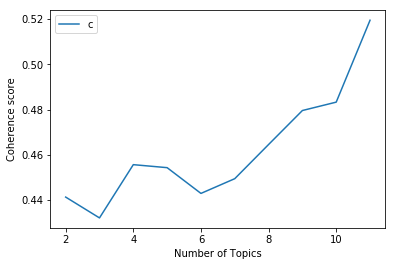

In [0]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [0]:
# LSA Model
number_of_topics=2
words=10
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '-0.680*"integral" + -0.676*"pan" + -0.143*"pit" + -0.121*"arab" + -0.089*"fibr" + -0.076*"linaz" + -0.073*"centen" + -0.060*"miel" + -0.047*"trig" + -0.047*"salv"'), (1, '0.614*"pit" + -0.478*"integral" + 0.393*"pan" + -0.291*"tost" + -0.212*"mini" + 0.187*"cer" + 0.123*"linaz" + 0.115*"blanc" + -0.112*"empaqu" + -0.086*"arab"')]


### **Que porcentaje de similaridad existe entre las palabras un cluster?**

In [0]:
import requests
from bs4 import BeautifulSoup
url='http://www.wordreference.com/sinonimos/'
enlace="gato" #input("palabra a buscar: ")
buscar=url+enlace
resp=requests.get(buscar)
bs=BeautifulSoup(resp.text,'lxml')
lista=bs.find_all(class_='trans clickable')
for sin in lista:
    sino=sin.find_all('li')
    for fin in sino:
        print(fin.next_element)
 

micho,  minino,  micifuz,  morrongo,  morroño
elevador,  palanca,  cric
sagaz,  astuto,  zorro,  traicionero,  pícaro
madrileño


In [0]:
import requests
from bs4 import BeautifulSoup
url='http://www.wordreference.com/definicion/'
enlace="gato" #input("palabra a buscar: ")
buscar=url+enlace
resp=requests.get(buscar)
bs=BeautifulSoup(resp.text,'lxml')
lista=bs.find_all(class_='trans clickable')
for sin in lista:
    sino=sin.find_all('li')
    for fin in sino:
        print(fin.next_element)

m. y f. Mamífero carnívoro doméstico de cabeza redonda,  lengua muy áspera,  patas cortas armadas de uñas fuertes,  agudas y retráctiles,  pelaje espeso y suave de diversos colores y ojos cuya pupila se dilata para ver en la oscuridad:
 
 m. Se da este nombre a todos los félidos en general. 
 Máquina para levantar grandes pesos a poca altura,  como la que se utiliza para elevar los vehículos al cambiar una rueda pinchada. 
 Instrumento de hierro o de madera compuesto de dos planchas con un tornillo que permite aproximarlas sujetando fuertemente la pieza que se coge entre ellas:
 
 
 
 
 
 
 
 
 


     |████████████████████████████████| 153kB 4.2MB/s 
     |████████████████████████████████| 81kB 24.9MB/s 
     |████████████████████████████████| 2.0MB 40.2MB/s 
     |████████████████████████████████| 102kB 28.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/7b/6c/23/eb26369b77904c8963fae9e64338b0f0b948b4d59710760834
Successfully built nodeenv
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.12.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


desodorante pies piedra lumbre
